### Minimizing Churn Rate Through Analysis of Financial Habits

#### Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('churn_data.csv')

#### EDA

In [3]:
data.head()

user  churn   age housing  credit_score  deposits  withdrawal  \
0  55409      0  37.0      na           NaN         0           0   
1  23547      0  28.0       R         486.0         0           0   
2  58313      0  35.0       R         561.0        47           2   
3   8095      0  26.0       R         567.0        26           3   
4  61353      1  27.0      na           NaN         0           0   

   purchases_partners  purchases  cc_taken  ...  waiting_4_loan  \
0                   0          0         0  ...               0   
1                   1          0         0  ...               0   
2                  86         47         0  ...               0   
3                  38         25         0  ...               0   
4                   2          0         0  ...               0   

   cancelled_loan  received_loan  rejected_loan  zodiac_sign  \
0               0              0              0          Leo   
1               0              0              0          Leo   
2               0              0              0    Capricorn   
3               0              0              0    Capricorn   
4               0              0              0        Aries   

   left_for_two_month_plus  left_for_one_month  rewards_earned  reward_rate  \
0                        1                   0             NaN         0.00   
1                        0                   0            44.0         1.47   
2                        1                   0            65.0         2.17   
3                        0                   0            33.0         1.10   
4                        1                   0             1.0         0.03   

   is_referred  
0            0  
1            1  
2            0  
3            1  
4            0  

[5 rows x 31 columns]

In [4]:
data.describe()

user         churn           age  credit_score      deposits  \
count  27000.000000  27000.000000  26996.000000  18969.000000  27000.000000   
mean   35422.702519      0.413852     32.219921    542.944225      3.341556   
std    20321.006678      0.492532      9.964838     61.059315      9.131406   
min        1.000000      0.000000     17.000000      2.000000      0.000000   
25%    17810.500000      0.000000     25.000000    507.000000      0.000000   
50%    35749.000000      0.000000     30.000000    542.000000      0.000000   
75%    53244.250000      1.000000     37.000000    578.000000      1.000000   
max    69658.000000      1.000000     91.000000    838.000000     65.000000   

         withdrawal  purchases_partners     purchases      cc_taken  \
count  27000.000000        27000.000000  27000.000000  27000.000000   
mean       0.307000           28.062519      3.273481      0.073778   
std        1.055416           42.219686      8.953077      0.437299   
min        0.000000            0.000000      0.000000      0.000000   
25%        0.000000            0.000000      0.000000      0.000000   
50%        0.000000            9.000000      0.000000      0.000000   
75%        0.000000           43.000000      1.000000      0.000000   
max       29.000000         1067.000000     63.000000     29.000000   

       cc_recommended  ...  registered_phones  waiting_4_loan  cancelled_loan  \
count    27000.000000  ...       27000.000000    27000.000000    27000.000000   
mean        92.625778  ...           0.420926        0.001296        0.018815   
std         88.869343  ...           0.912831        0.035981        0.135873   
min          0.000000  ...           0.000000        0.000000        0.000000   
25%         10.000000  ...           0.000000        0.000000        0.000000   
50%         65.000000  ...           0.000000        0.000000        0.000000   
75%        164.000000  ...           0.000000        0.000000        0.000000   
max        522.000000  ...           5.000000        1.000000        1.000000   

       received_loan  rejected_loan  left_for_two_month_plus  \
count   27000.000000   27000.000000             27000.000000   
mean        0.018185       0.004889                 0.173444   
std         0.133623       0.069751                 0.378638   
min         0.000000       0.000000                 0.000000   
25%         0.000000       0.000000                 0.000000   
50%         0.000000       0.000000                 0.000000   
75%         0.000000       0.000000                 0.000000   
max         1.000000       1.000000                 1.000000   

       left_for_one_month  rewards_earned   reward_rate   is_referred  
count        27000.000000    23773.000000  27000.000000  27000.000000  
mean             0.018074       29.110125      0.907684      0.318037  
std              0.133222       21.973478      0.752016      0.465723  
min              0.000000        1.000000      0.000000      0.000000  
25%              0.000000        9.000000      0.200000      0.000000  
50%              0.000000       25.000000      0.780000      0.000000  
75%              0.000000       48.000000      1.530000      1.000000  
max              1.000000      114.000000      4.000000      1.000000  

[8 rows x 28 columns]

In [5]:
pp.ProfileReport(data)

In [6]:
data.columns

Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [7]:
# Missing values

missing_data = data.isnull().sum()
missing_perc = (missing_data/data.shape[0])*100

In [8]:
missing = pd.concat([missing_data, missing_perc], axis = 1 )
missing.columns = ['missing_data', 'missing_perc']

In [9]:
missing[missing['missing_data'] >0]

missing_data  missing_perc
age                        4      0.014815
credit_score            8031     29.744444
rewards_earned          3227     11.951852

**Removing the missing data i.e rows where age is null as the data is very small and complete credit_score, rewards_earned columns are the data is small**

In [10]:
# Remove the rows where age is null
data = data[data['age'].notnull()]

# Remove credit_score, rewards_earned columns
data = data.drop(['credit_score', 'rewards_earned'], axis = 1)

In [11]:
data.shape

(26996, 29)

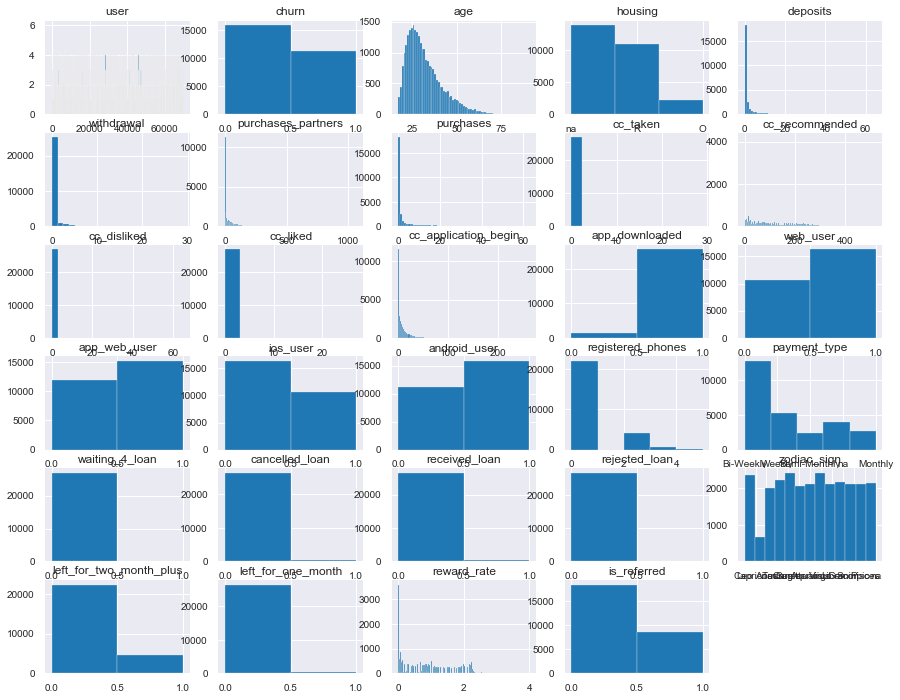

In [13]:
# Histogram
plt.figure(figsize=(15,12))
for i in range(1, data.shape[1] + 1):
    plt.subplot(6,5,i)
    f = plt.gca()
    col = data.columns.tolist()[i - 1]
    val = data[col].nunique()
    plt.hist(data[col], bins = val)
    f.set_title(col)

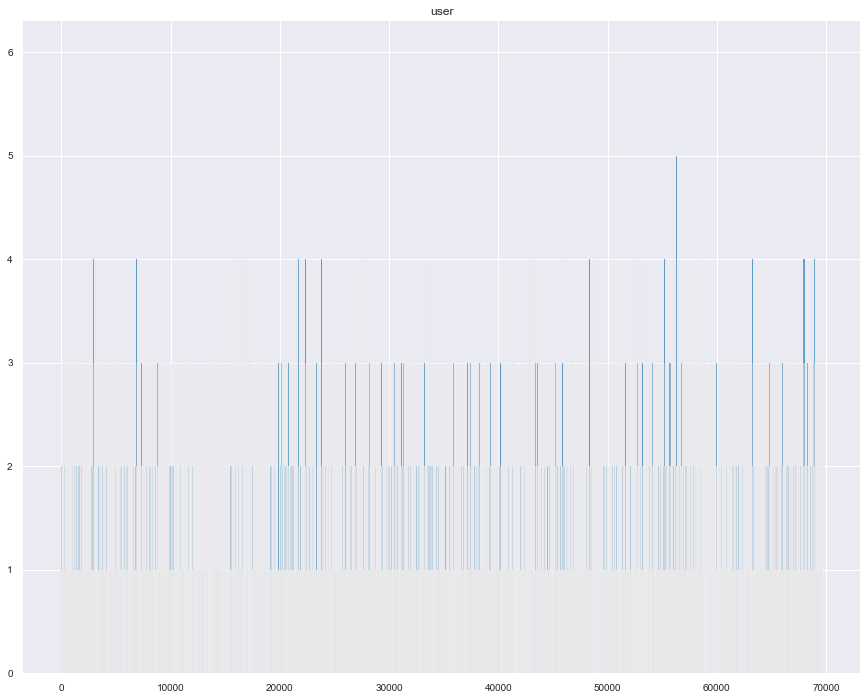

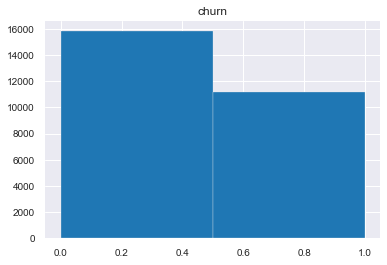

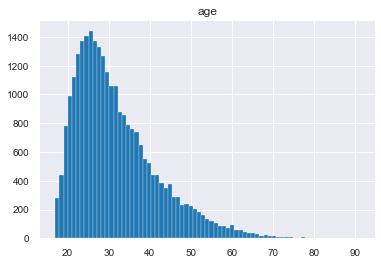

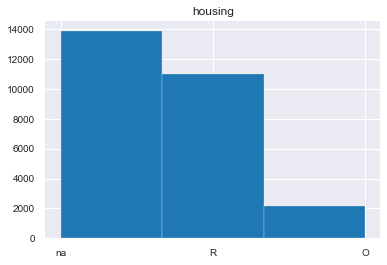

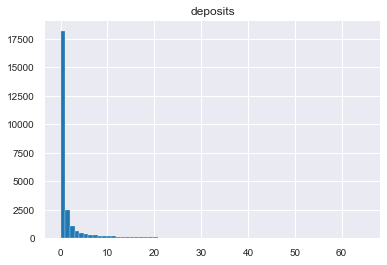

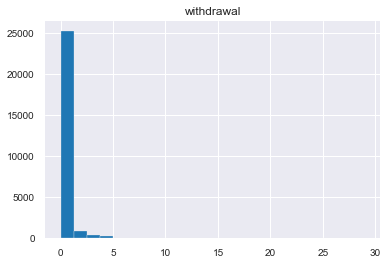

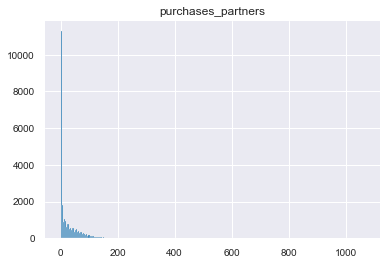

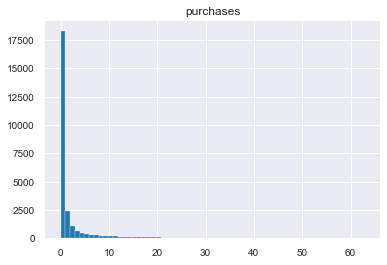

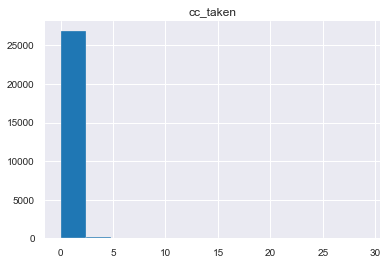

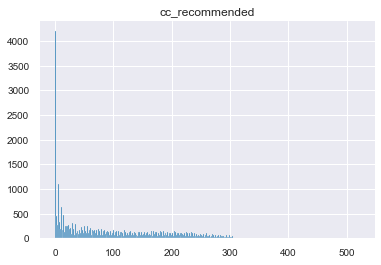

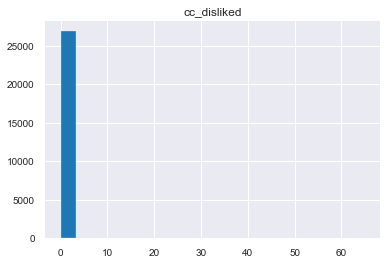

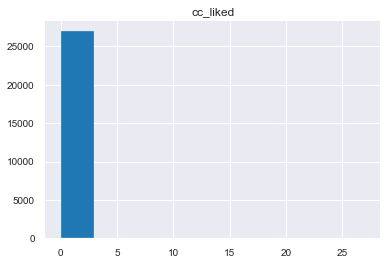

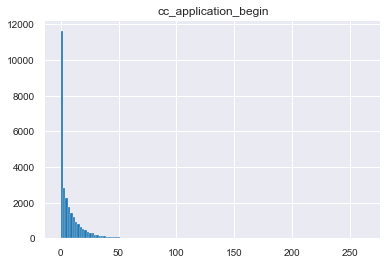

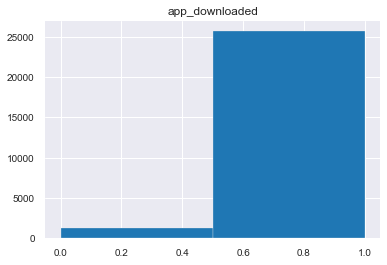

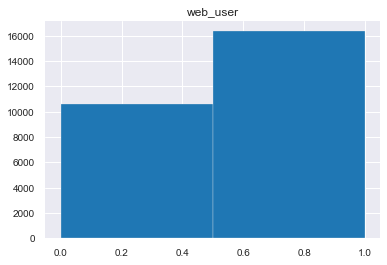

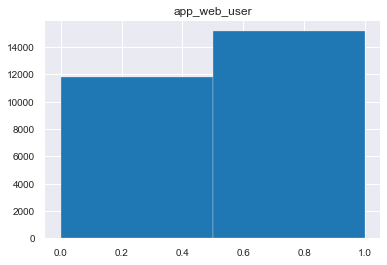

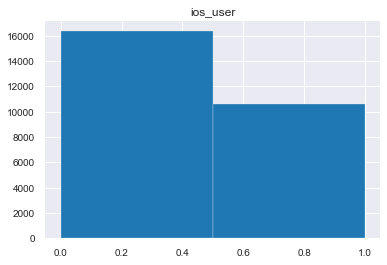

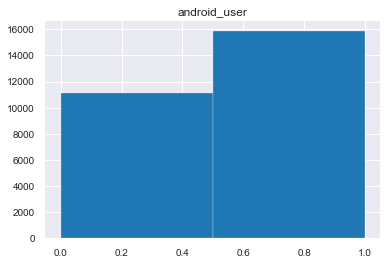

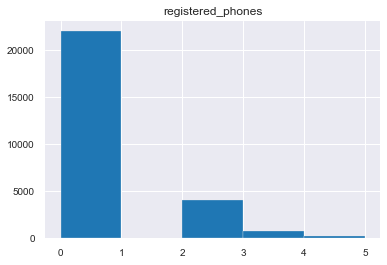

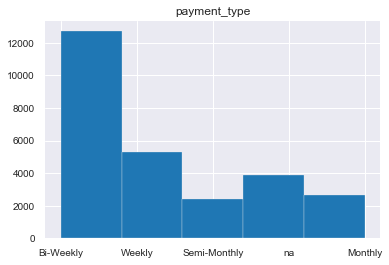

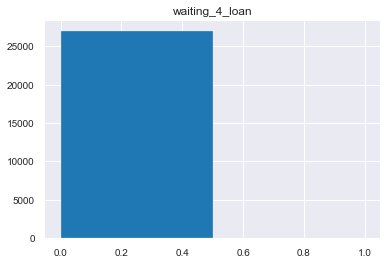

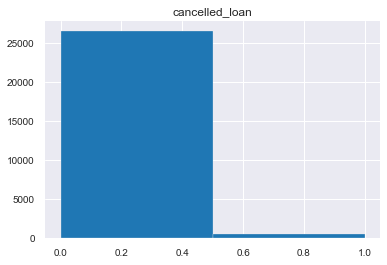

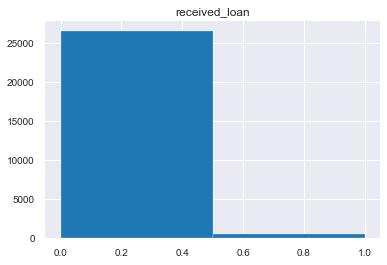

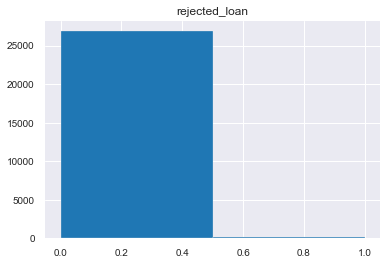

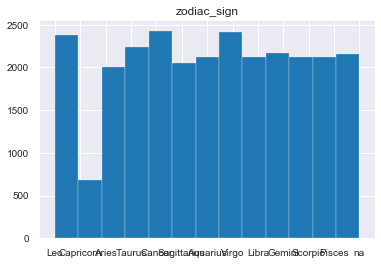

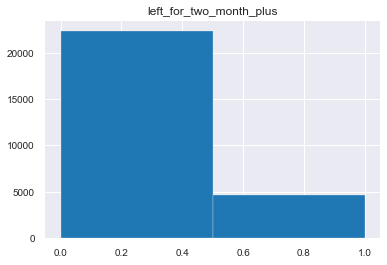

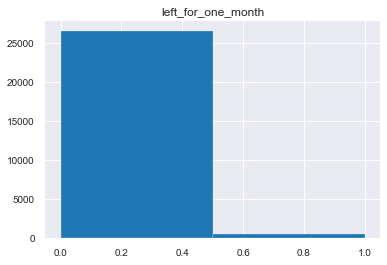

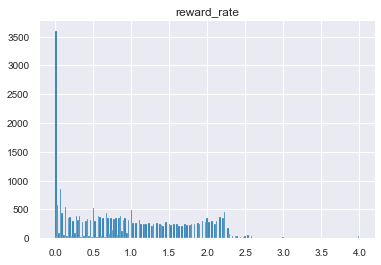

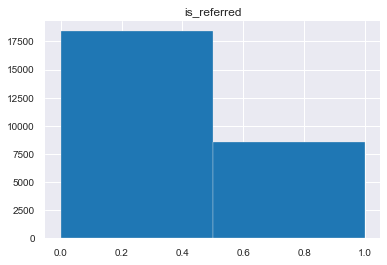

In [15]:
plt.figure(figsize=(15,12))
for i in data.columns:
    col = data[i]
    val = data[i].nunique()
    plt.hist(data[i], bins = val)
    plt.title(i)
    plt.show()

In [16]:
# Pie Chart - Binary columns

data2 = data[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']]

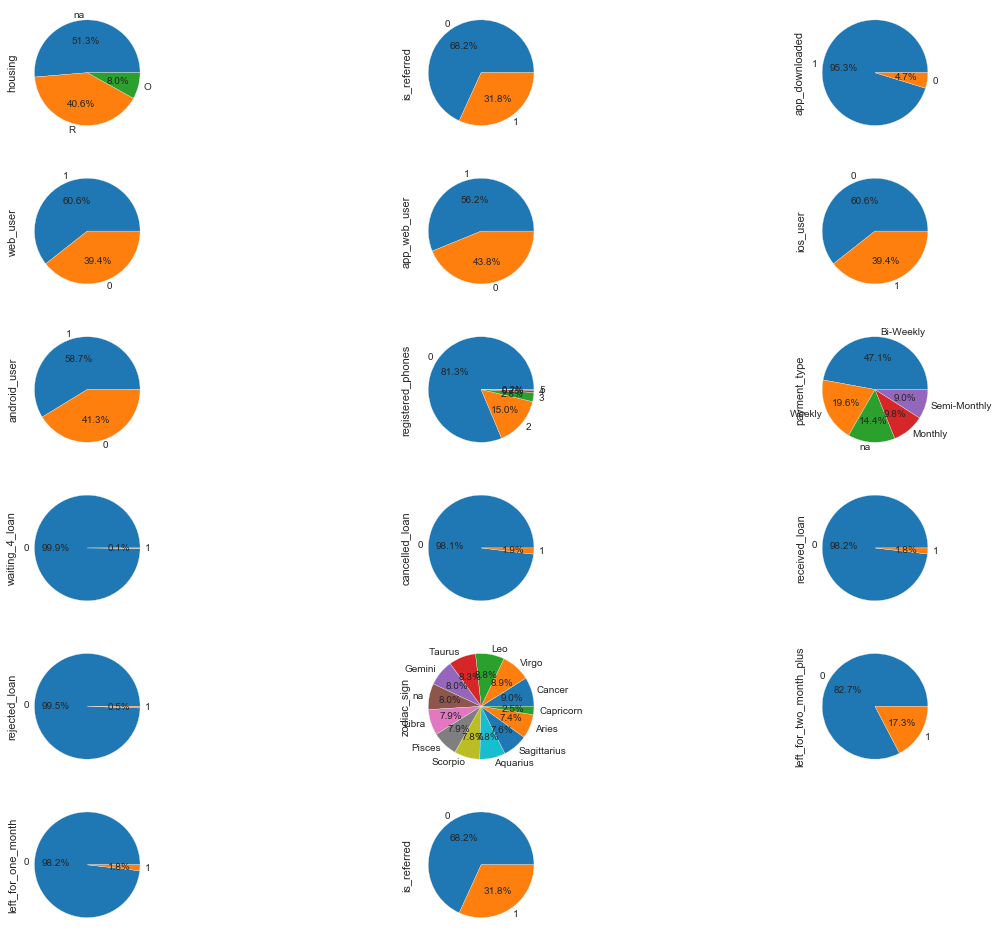

In [17]:
fig = plt.figure(figsize=(20,17))
for i in range(1, data2.shape[1]+1):
    plt.subplot(6,3,i)
    f = plt.gca()
    col = data2.columns.tolist()[i-1]
    data[col].value_counts().plot.pie(autopct='%1.1f%%')
#fig.tight_layout(rect=[1, 1, 1, 1])

**Following columns have uneven data <br> waiting_4_loan,<br> cancelled_loan,<br> received_loan,<br> rejected_loan, <br>left_for_one_month**

**Check any bias of respective columns with target column**

In [18]:
col = ["waiting_4_loan","cancelled_loan","received_loan","rejected_loan","left_for_one_month"]
col

['waiting_4_loan',
 'cancelled_loan',
 'received_loan',
 'rejected_loan',
 'left_for_one_month']

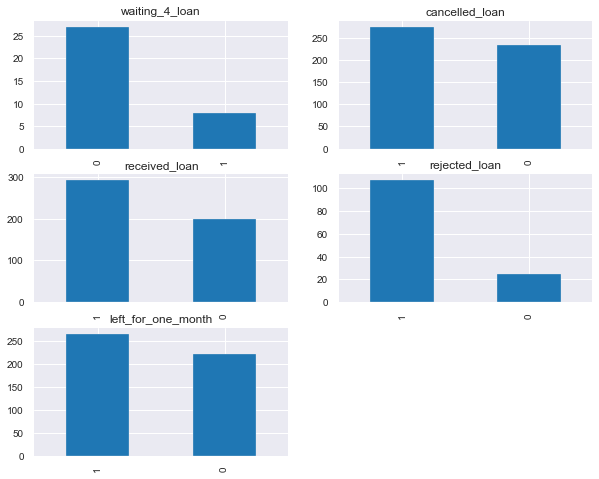

In [19]:
fig = plt.figure(figsize=(10,8))
for a,i in enumerate(col):
    plt.subplot(3,2,a+1)
    f = plt.gca()
    data[data2[i] == 1]["churn"].value_counts().plot.bar()
    plt.title(i)

* **The above feaures are not bias to the target**
* for example waiting_4_loan == 1 has the target of both 1 & 0

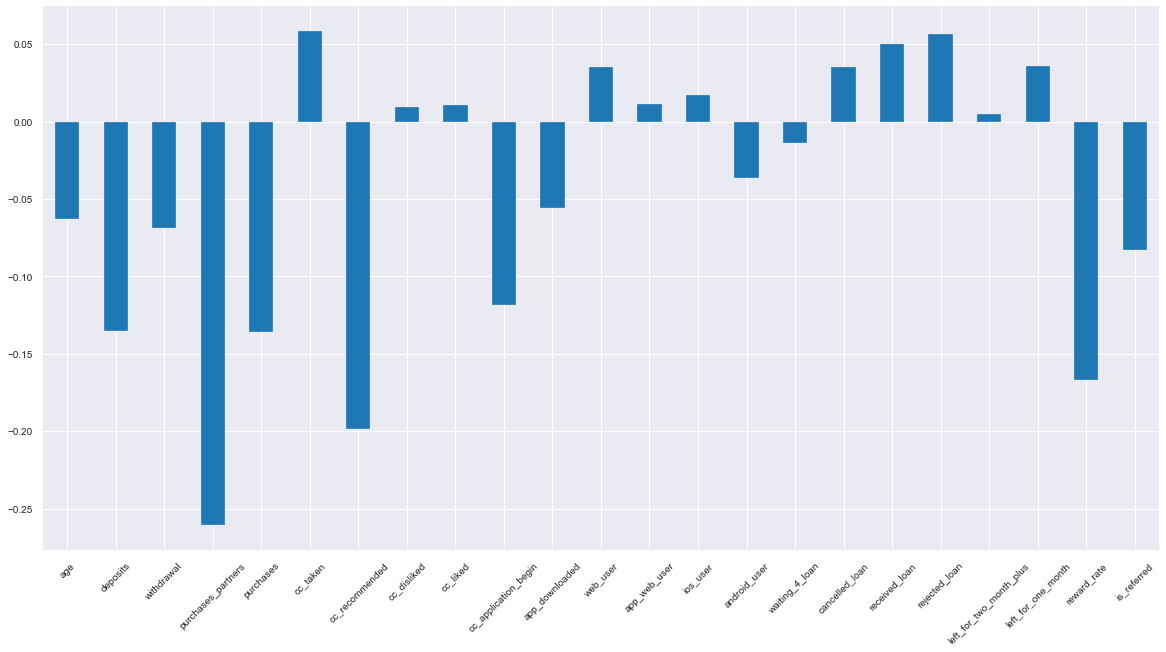

In [34]:
corr_churn = data.drop(['housing', 'payment_type','registered_phones', 'zodiac_sign','churn','user' ], axis = 1).corrwith(data['churn'])
corr_churn.plot.bar(figsize = (20,10), rot = 45, grid = True)

**Below variables are positively correlated with Churn . I.e Higher the count in below variables then more prone to Churn**

'cc_taken',
 'cc_disliked',
 'cc_liked',
 'web_user',
 'app_web_user',
 'ios_user',
 'cancelled_loan',
 'received_loan',
 'rejected_loan',
 'left_for_two_month_plus',
 'left_for_one_month'
 
 **Below variables are Negitively correlated with Churn . I.e Lower the count in below variables then more prone to Churn**

 'age',
 'deposits',
 'withdrawal',
 'purchases_partners',
 'purchases',
 'cc_recommended',
 'cc_application_begin',
 'app_downloaded',
 'android_user',
 'waiting_4_loan',
 'reward_rate',
 'is_referred'

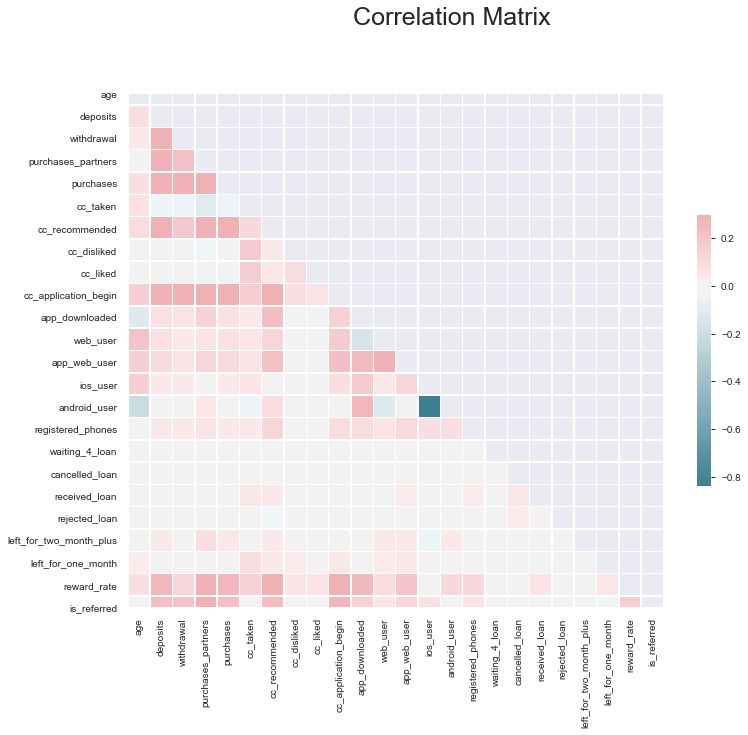

In [44]:
# plot dignal correlation matrix - https://seaborn.pydata.org/examples/many_pairwise_correlations.html

corr = data.drop(columns = ['user', 'churn']).corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))
f.suptitle("Correlation Matrix", fontsize = 25)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot_kws={"size": 12})

* **The Scale shows that +ve value to 0.2 which is very small when compared to -ve value to 0.8. So we can ignore the red square columns**

* ios_user shows strong correlation with android user
* By name we can say that ios_user, web_user, app_web_user has a relation and these columns are not independent to each other. so we need to remove one column

In [45]:
data = data.drop(columns = ['app_web_user'])
data.to_csv('new_churn_data.csv', index = False)

In [2]:
data = pd.read_csv('new_churn_data.csv')

### Machine Learning

#### Data Preparation

In [8]:
# Seperate identifiers

user_identifier = data['user']
data = data.drop(['user'], axis = 1)

In [10]:
# One-hot encoding for category variables

data = pd.get_dummies(data, drop_first=True)

In [31]:
data.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'ios_user',
       'android_user', 'registered_phones', 'waiting_4_loan', 'cancelled_loan',
       'received_loan', 'rejected_loan', 'left_for_two_month_plus',
       'left_for_one_month', 'reward_rate', 'is_referred', 'housing_R',
       'housing_na', 'payment_type_Monthly', 'payment_type_Semi-Monthly',
       'payment_type_Weekly', 'payment_type_na', 'zodiac_sign_Aries',
       'zodiac_sign_Cancer', 'zodiac_sign_Capricorn', 'zodiac_sign_Gemini',
       'zodiac_sign_Leo', 'zodiac_sign_Libra', 'zodiac_sign_Pisces',
       'zodiac_sign_Sagittarius', 'zodiac_sign_Scorpio', 'zodiac_sign_Taurus',
       'zodiac_sign_Virgo', 'zodiac_sign_na'],
      dtype='object')

In [32]:
X = data.drop(['churn'], axis = 1)
y = data['churn']

In [33]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify = y)

In [34]:
print('The shape of X_train is',X_train.shape)
print('The shape of X_test is',X_test.shape)
print('the shape of y_train is',y_train.shape)
print('the shape of y_test is',y_test.shape)

The shape of X_train is (21596, 41)
The shape of X_test is (5400, 41)
the shape of y_train is (21596,)
the shape of y_test is (5400,)


In [45]:
print('The shape of X_train is',X_train.shape)
print('The shape of X_test is',X_test.shape)
print('the shape of y_train is',y_train.shape)
print('the shape of y_test is',y_test.shape)

The shape of X_train is (17878, 41)
The shape of X_test is (5400, 41)
the shape of y_train is (17878,)
the shape of y_test is (5400,)


In [35]:
y_train.value_counts(normalize=True)

0    0.586081
1    0.413919
Name: churn, dtype: float64

In [36]:
y_test.value_counts(normalize=True)

0    0.586111
1    0.413889
Name: churn, dtype: float64

In [40]:
# Balancing the Training Set

pos_index = y_train[y_train.values == 1].index
neg_index = y_train[y_train.values == 0].index

if len(pos_index) > len(neg_index):
    higher = pos_index
    lower = neg_index
else:
    lower = pos_index
    higher = neg_index
    
import random
random.seed(0)
higher = np.random.choice(higher, size = len(lower))
lower = np.asarray(lower)

In [43]:
new_index = np.concatenate((lower,higher))
X_train = X_train.loc[new_index,]
y_train = y_train.loc[new_index]

In [44]:
y_train.value_counts(normalize = True)

1    0.5
0    0.5
Name: churn, dtype: float64

In [47]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test = X_test2


#### Model Building

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

#### Validation

In [56]:
cm = confusion_matrix(y_test,y_predict)
cm

array([[1626, 1539],
       [ 518, 1717]], dtype=int64)

In [57]:
accuracy = accuracy_score(y_test, y_predict)
f1_scoreval = f1_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)

print('Accuracy of the model is: %0.3f' %(accuracy*100),'%')
print('f1_score of the model is: %0.3f' %(f1_scoreval))
print('precision of the model is: %0.3f' %(precision))
print('recall of the model is: %0.3f' %(recall))

Accuracy of the model is: 61.907 %
f1_score of the model is: 0.625
precision of the model is: 0.527
recall of the model is: 0.768


#### K- fold Cross-validation

In [58]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(classifier, X_train, y_train, cv = 10)

In [62]:
print('Logistic Regression Model accuracy is %0.3f (+/- %0.3f)' %(accuracy.mean(), accuracy.std()*2))

Logistic Regression Model accuracy is 0.643 (+/- 0.033)


In [86]:
imp_features = pd.concat([pd.DataFrame(X_train.columns, columns=['Features']),
                          pd.DataFrame(np.transpose(classifier.coef_), columns=['coeff'])], axis = 1)

In [90]:
imp_features = imp_features.sort_values('coeff')
print(imp_features.head(3))
print('*'*20)
print(imp_features.tail(3))

              Features     coeff
3   purchases_partners -0.731006
4            purchases -0.428986
21         reward_rate -0.207289
********************
     Features     coeff
23  housing_R  0.119452
11   web_user  0.141110
1    deposits  0.316580


#### Feature Selection

In [92]:
# Selecting top 20 feaures

from sklearn.feature_selection import RFE
rfe = RFE(classifier, n_features_to_select=20)

In [95]:
rfe = rfe.fit(X_train, y_train)

In [102]:
best_20 = X_train.columns[rfe.support_]

In [103]:
X_train = X_train[best_20]

#### Grid search for best parameters

In [104]:
from sklearn.model_selection import GridSearchCV

paramas = {'C' : [0.1, 0.5, 0.9, 1, 2, 5], 'penalty' : ['l1', 'l2']}

gridcv = GridSearchCV(estimator = classifier,param_grid = paramas,refit=True, cv=10, scoring='accuracy' )
gridcv.fit(X_train, y_train)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=0, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 0.9, 1, 2, 5],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [105]:
gridcv.best_params_

{'C': 0.9, 'penalty': 'l1'}

In [107]:
y_predict = gridcv.predict(X_test[best_20])

cm = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

f1_scoreval = f1_score(y_test, y_predict)
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)

print('confusion matrix ')
print(cm)

print('Accuracy of the model is: %0.3f' %(accuracy*100),'%')
print('f1_score of the model is: %0.3f' %(f1_scoreval))
print('precision of the model is: %0.3f' %(precision))
print('recall of the model is: %0.3f' %(recall))

confusion matrix 
[[1626 1539]
 [ 513 1722]]
Accuracy of the model is: 62.000 %
f1_score of the model is: 0.627
precision of the model is: 0.528
recall of the model is: 0.770


* **Model Accuracy is 62%. It wasn't changed much even after application of GridSearch and Best 20 features**
* This shows that other 20 features are not adding any value to the model

In [113]:
final_results = pd.concat([y_test, user_identifier], axis = 1).dropna()
final_results['pred_churn'] = y_pred
final_results = final_results[['user', 'churn','pred_churn']].reset_index(drop=True)

In [114]:
final_results

user  churn  pred_churn
0     55409    0.0           1
1      3120    1.0           1
2     65427    1.0           1
3     30419    1.0           1
4     30693    0.0           1
...     ...    ...         ...
5395  15515    1.0           1
5396  50564    1.0           0
5397  22955    0.0           0
5398  49367    0.0           1
5399  52752    1.0           1

[5400 rows x 3 columns]